# Regression and Models

So far most of our results have been looking at single variate statistics and distributions. Even in the case when we looked at multivariate distributions we were taking the point of view that the distribution was describing our sampling procedure and that the variables were independent. However often we are confronted with data describing two variables from the members of our population and the task then is to see if there is a relationship between the variables, and if there is to describe it or model it. 

A nice example that is coded as part of the standard installation in R is the cars dataset:

In [1]:
# Load the ggplot2 package
library(ggplot2)

In [2]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


We are interested in explaining the relationship between the engine displacement of a car and its highway fuel effeciency:

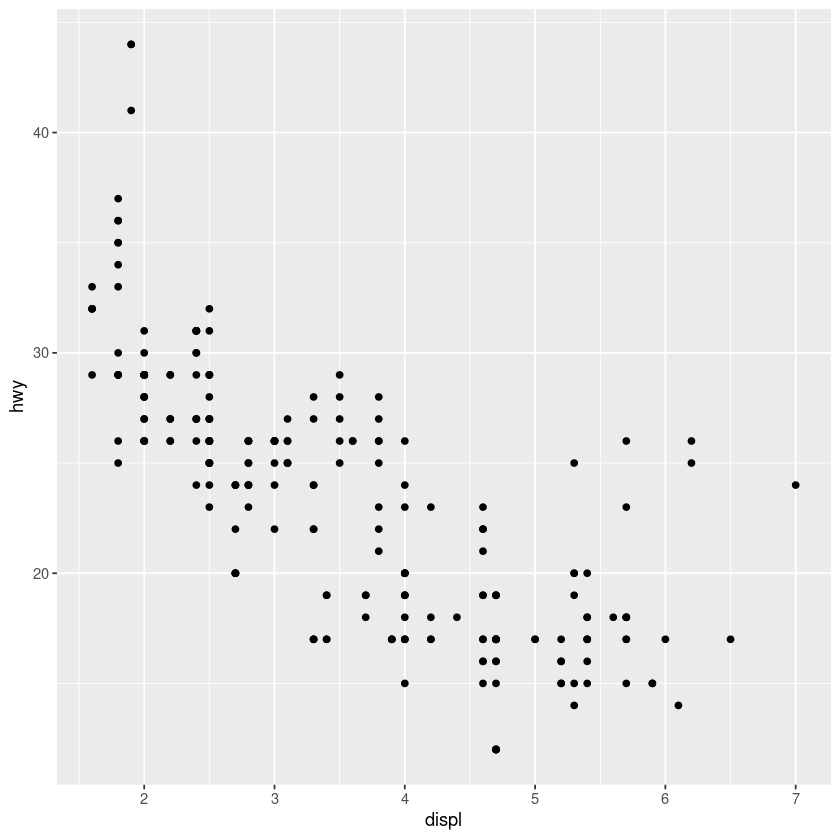

In [3]:
ggplot(data = mpg) + geom_point(mapping = aes( x = displ, y = hwy ))

It appears that there is something of a linear relationship between these two variables but it is not an exact relationship. Note that the displacement variable in this example is not random - it is a feature of the cars design. We are going to think of the relationship as:

$$ \mbox{hwy} = a \cdot \mbox{displ} + b + \mbox{Error} $$ 

where the $\mbox{Error}$ variable is modeled as a random variable. In truth what it encapsulates is all of the other variables that translate into a car's highway fuel effeciency, but given that we do not know most of these variables for this data, it is helpful to think of them all as adding up to some random effect on the highway effeciency. 

Our task is to choose $a$ and $b$ such that the variable $\mbox{Error}$ is controlled. Typically this would mean that we want its variance to be minimized. The advantage of minimizing $\mbox{variance}$ is that it will bring in some techniques from Calculus that we can use in finding minimums. 

To start note that we can choose $b$ such that the mean of the $\mbox{Error}$ term is 0. Therefore the task of minimizing its variance is to minimize the Total Squared Error:

$$ TSE = \sum_{data} \mbox{Error}^2 $$

Fix one of our data points as $ (x_0, y_0)$. 
Let $\hat{y} = a x +b $ then we have

$$ TSE = \sum_{i} ( y_i - \hat{y}_i)^2 = \sum_{i} ( y_i - a x_i - b)^2 $$

We note that this is a quadratic function of $a$ and $b$ and therefore it will have a single minimum as a critical point unless we are in a degenerate case. When we have finished finding $a$ and $b$ in the generic case we will say a bit about what a degenerate case would look like, but you might be able to make a hypothesis about it.

Critical points of $TSE$ will occur when the partial derrivatives with respect to $a$ and $b$ are both 0. So we are trying to solve the system of equations:

$$ \frac{\partial TSE}{\partial a} = - \sum_i 2 x_i (y_i - a x_i - b) = 0 $$
$$ \frac{\partial TSE}{\partial b} = - \sum_i 2 (y_i - a x_i - b) = 0 $$

This is sort of a pain to do without using some techniques from linear algebra, however what you should be able to convince yourself of is that this system is linear in $a$ and $b$, and therefore unless we are in a degenerate case there will be a unique solution. And that using linear algebra there is a procedure for finding this unique solution.

R has the solution to linear (and other types of regression) encoded with the *lm* function:

In [4]:
out <- lm( hwy ~ displ, data=mpg)
out


Call:
lm(formula = hwy ~ displ, data = mpg)

Coefficients:
(Intercept)        displ  
     35.698       -3.531  


The result of lm can be plotted with the data. The *se = FALSE* option turns off the error region on the estimate, in a moment we will explain how that is computed and then we can use it.

`geom_smooth()` using formula 'y ~ x'



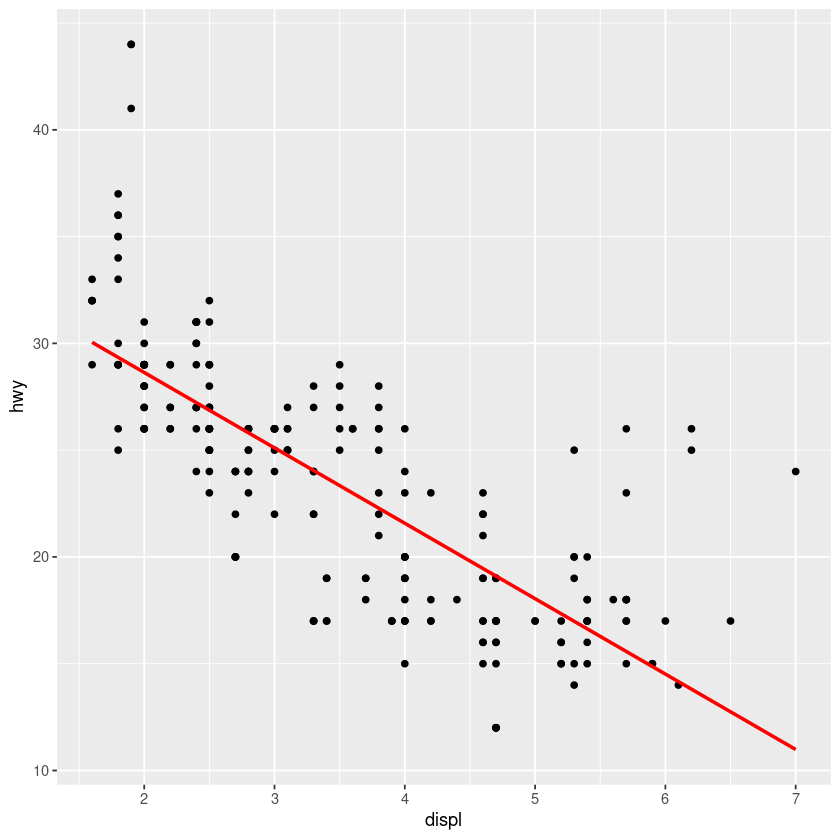

In [5]:
ggplot(data = mpg) + 
    geom_point(mapping = aes( x = displ, y = hwy )) +
    geom_smooth(mapping = aes( x=displ, y = hwy ), method = "lm", col = "red", se=FALSE)

The ouput of the *lm* command contains information about the error from each point, the residuals:

In [6]:

out[['residuals']]

1           2           3           4           5           6 
-0.34259120 -0.34259120  2.36352656  1.36352656  0.18799761  0.18799761 
          7           8           9          10          11          12 
 2.24717425 -3.34259120 -4.34259120 -0.63647344 -1.63647344 -0.81200239 
         13          14          15          16          17          18 
-0.81200239  0.24717425  0.24717425 -1.81200239  0.24717425  2.13082193 
         19          20          21          22          23          24 
 3.01446962 -1.98553038  3.01446962  1.42670514  2.48588179 10.42670514 
         25          26          27          28          29          30 
 7.42670514 12.19199955 11.19199955 13.01647059  2.01446962 -2.98553038 
         31          32          33          34          35          36 
-0.57329486  4.25117619 -0.22423792  2.77576208  1.24717425  5.65940977 
         37          38          39          40          41          42 
 3.01246865 -3.22423792 -1.10588463 -2.04670799 -2.04670799 -0.04670799 
         43          44          45          46          47          48 
-0.04670799 -7.04670799 -0.28141359 -1.28141359  0.71858641  1.42470417 
         49          50          51          52          53          54 
-3.63447247 -4.63447247 -4.92835471 -4.92835471 -0.10388366 -0.10388366 
         55          56          57          58          59          60 
-7.10388366 -0.33858926 -2.33858926 -4.92835471 -2.10388366 -7.10388366 
         61          62          63          64          65          66 
-2.10388366 -1.33858926  2.42670514  0.13282290 -3.10388366 -7.10388366 
         67          68          69          70          71          72 
-2.10388366 -2.10388366 -3.10388366 -7.10388366 -2.33858926 -1.33858926 
         73          74          75          76          77          78 
 1.42670514  0.13282290 -2.45694254  0.36752850  1.36752850 -4.57529583 
         79          80          81          82          83          84 
-2.57529583 -4.57529583 -2.57529583 -0.45694254 -1.04470702 -3.86917807 
         85          86          87          88          89          90 
-3.86917807 -3.45694254 -3.45694254 -2.45694254 -1.63247150  0.36752850 
         91          92          93          94          95          96 
 3.71858641  2.71858641  4.42470417  2.42470417  1.54305746  2.54305746 
         97          98          99         100         101         102 
 3.54305746  2.54305746  3.36752850  2.95129104  1.95129104  1.95129104 
        103         104         105         106         107         108 
-1.04870896  1.95129104  4.65740880  6.65740880  6.65740880  0.36352656 
        109         110         111         112         113         114 
-1.22423792 -0.22423792  2.77576208  3.77576208 -0.87117904 -0.87117904 
        115         116         117         118         119         120 
 3.95329201 -2.63647344  0.36352656 -0.63647344 -1.63647344 -2.16506128 
        121         122         123         124         125         126 
-2.16506128 -2.16506128 -3.10588463 -3.63447247 -1.57529583 -2.10388366 
        127         128         129         130         131         132 
-7.10388366 -0.10388366  2.42670514 -0.16105933 -6.57529583 -2.86917807 
        133         134         135         136         137         138 
-2.16306030 -4.45694254  0.36752850 -0.63247150  1.36752850 -4.57529583 
        139         140         141         142         143         144 
-2.57529583 -0.45694254 -1.04470702  1.77576208 -0.22423792  4.12882096 
        145         146         147         148         149         150 
 5.12882096  3.65940977  2.65940977  0.89411537 -0.10588463  1.65940977 
        151         152         153         154         155         156 
-7.04670799 -7.04670799 -1.57529583  2.07364626  1.24717425  3.71858641 
        157         158         159         160         161         162 
 4.71858641  5.71858641  8.01446962 -1.87117904 -2.87117904  0.12882096 
        163         164         165         166         167         

and summing over the square of these residuals gives the TSE we have minimized:

In [7]:
TSE = sum( out[['residuals']]^2)
TSE

[1] 3413.829

## Confidence Intervals Around a Regression

